#**False Data Injection Attack on Cyber Physical Power System Detection Using Semi Supervised Learning**

While numerous supervised machine learning methods have been proposed to detect cyber-attacks in CPPS, they require a large dataset of normal and attack instances for training. However, gathering sufficient samples of diverse attack scenarios, especially zero-day attacks, is challenging.

## 1. Objective

1. We develop a semi-supervised model to detect grid attacks. The model would thus be better for practical application as it would be better at classifying attacks that it has not seen in the labelled dataset.
2. We will also train a supervised Random Forrest model to compare with the past Random Forrest model we had trained.

## 2. Data Preprocessing

1. Data Source: Voltage and phasor measurements labeled as normal/attack.
2. Cleaning:
   1. Removed infinite values and replaced them with the median.
   2. Standardized features using StandardScaler.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
normal_raw = pd.read_csv('gdrive/My Drive/FDIA Detection Using ML Methods/IEE118_normal_results_15k.csv')
attack_raw = pd.read_csv('gdrive/My Drive/FDIA Detection Using ML Methods/IEE118_attack_results_15k.csv')

normal_raw.describe()

combined_df = pd.concat([normal_raw, attack_raw], axis=0, ignore_index=True)

data = combined_df
combined_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,346,347,348,349,350,351,352,353,354,355
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.955157,0.970407,0.968010,0.996983,1.001323,0.989759,0.989248,1.016870,1.043026,1.051137,...,39.214284,0.028271,68.265169,6.056289,8.051394,22.129862,184.753928,20.102261,33.132794,0.500000
std,0.191250,0.188326,0.184085,0.188234,0.183715,0.189184,0.191944,0.189101,0.190961,0.184745,...,6.354712,0.445949,9.816918,0.922059,1.089062,3.492958,26.175545,2.906437,4.568181,0.500008
min,-3.442669,-2.047495,-3.812594,-1.926533,-3.054991,-2.065296,-2.126737,-2.696631,-2.361348,-2.162041,...,0.000000,-0.417522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920790,0.937125,0.933810,0.964293,0.967608,0.955760,0.955535,0.981209,1.009369,1.016354,...,38.966462,-0.034295,67.965635,5.965637,7.966054,21.965784,183.966215,19.965519,32.965695,0.000000
50%,0.954953,0.971333,0.968299,0.998951,1.001385,0.990079,0.989402,1.015288,1.043030,1.050168,...,39.000605,0.000130,67.999844,6.000148,8.000250,22.000340,184.000082,19.999803,32.999857,0.500000
75%,0.989364,1.005660,1.001952,1.032346,1.035612,1.024446,1.023756,1.048839,1.076870,1.084159,...,39.034181,0.034156,68.034064,6.034388,8.034518,22.034182,184.033937,20.033506,33.034153,1.000000
max,4.086837,4.736227,5.333843,3.996384,6.624224,4.050982,5.008182,5.192250,3.930148,4.864556,...,432.703619,10.000000,282.248616,47.432481,68.859187,204.580331,722.485066,83.132996,225.739342,1.000000


In [ ]:
# Drop unnecessary columns (like unnamed ones)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')].copy()

# Replace 'inf' and '-inf' with NaN, then handle missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

data.describe()

,1,2,3,4,5,6,7,8,9,10,...,346,347,348,349,350,351,352,353,354,355
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.955157,0.970407,0.968010,0.996983,1.001323,0.989759,0.989248,1.016870,1.043026,1.051137,...,39.214284,0.028271,68.265169,6.056289,8.051394,22.129862,184.753928,20.102261,33.132794,0.500000
std,0.191250,0.188326,0.184085,0.188234,0.183715,0.189184,0.191944,0.189101,0.190961,0.184745,...,6.354712,0.445949,9.816918,0.922059,1.089062,3.492958,26.175545,2.906437,4.568181,0.500008
min,-3.442669,-2.047495,-3.812594,-1.926533,-3.054991,-2.065296,-2.126737,-2.696631,-2.361348,-2.162041,...,0.000000,-0.417522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920790,0.937125,0.933810,0.964293,0.967608,0.955760,0.955535,0.981209,1.009369,1.016354,...,38.966462,-0.034295,67.965635,5.965637,7.966054,21.965784,183.966215,19.965519,32.965695,0.000000
50%,0.954953,0.971333,0.968299,0.998951,1.001385,0.990079,0.989402,1.015288,1.043030,1.050168,...,39.000605,0.000130,67.999844,6.000148,8.000250,22.000340,184.000082,19.999803,32.999857,0.500000
75%,0.989364,1.005660,1.001952,1.032346,1.035612,1.024446,1.023756,1.048839,1.076870,1.084159,...,39.034181,0.034156,68.034064,6.034388,8.034518,22.034182,184.033937,20.033506,33.034153,1.000000
max,4.086837,4.736227,5.333843,3.996384,6.624224,4.050982,5.008182,5.192250,3.930148,4.864556,...,432.703619,10.000000,282.248616,47.432481,68.859187,204.580331,722.485066,83.132996,225.739342,1.000000


#### 2.1 Dataset distribution

The dataset has equal numbers of normal and attack scenarios. This ensures that the model is equally good at classifying both the categories.

We can see that in the piechart visualisation given below.

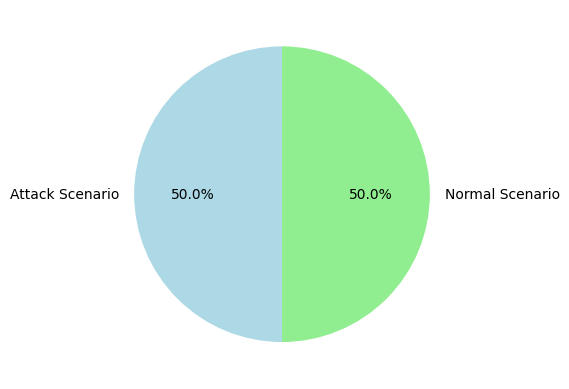

In [ ]:
labels = data.iloc[:,-1]
counts = labels.value_counts()

#pie cchart representaion
categories = ['Attack Scenario', 'Normal Scenario']
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
#plt.title('Distribution of Attack and Normal condition data.')
plt.savefig("dataset_distr.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns

#### 2.2 Train-Test Split

Using the train_test_split function from sklearn.model_selection library, we have split the data.

**80% will be used for Training and 20% for Testing**

In [ ]:
# Separate features and labels
features = data.iloc[:, :-1].values  # All columns except the last
labels = data.iloc[:, -1].values     # Last column for prediction

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# y_train.min()

## 3. Supervised learning

Using the same model with fully labelled dataset, we can get the metrics for supervised learning. We will use these to compare the semi-supervised results.

We will be making use of K-nearest neighbours (KNN) model for both supervised and semi-supervised.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Supervised Learning with Label Spreading
modelSupervised = LabelSpreading(kernel='knn', n_neighbors=5)
modelSupervised.fit(X_train, y_train)

LabelSpreading(kernel='knn', n_neighbors=5)

In [ ]:
# Predict and evaluate
y_pred = modelSupervised.predict(X_test)
print("Classification Report (0: Normal, 1: Attack):")
print(classification_report(y_test, y_pred))
print("Label Distribution:")
print(pd.Series(y_test).value_counts())
print("\nAccuracy:", accuracy_score(y_test, y_pred))

accuFull = accuracy_score(y_test, y_pred)*100
presFull = precision_score(y_test, y_pred)*100
recallFull = recall_score(y_test, y_pred)*100
f1Full = f1_score(y_test, y_pred)*100
cmFull = confusion_matrix(y_test, y_pred)

print("Precision: ", presFull)
print("Recall: ", recallFull)
print("F1 Score: ", f1Full)

print(cmFull)

Classification Report (0: Normal, 1: Attack):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3048
           1       1.00      0.97      0.99      2952

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Label Distribution:
0    3048
1    2952
Name: count, dtype: int64

Accuracy: 0.9868333333333333
Precision:  100.0
Recall:  97.32384823848238
F1 Score:  98.64377682403433
[[3048    0]
 [  79 2873]]


## 4. Semi-Supervised learning

1. We will randomly drop 30% of the training labels to simulate semi-supervised learning
2. The model will be trained on 70% labelled and 30% unlabelled dataset.

In [ ]:
# Randomly drop 30% of the training labels to simulate semi-supervised learning
np.random.seed(42)
unlabeled_mask = np.random.rand(len(y_train)) < 0.3
y_train[unlabeled_mask] = -1
# y_train.min()

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SEMI-SUPERVISED Learning with Label Spreading and dropped labels in the training data
modelSemi = LabelSpreading(kernel='knn', n_neighbors=5)
modelSemi.fit(X_train, y_train)

LabelSpreading(kernel='knn', n_neighbors=5)

In [ ]:
# Predict and evaluate
y_pred = modelSemi.predict(X_test)
print("Classification Report (0: Normal, 1: Attack):")
print(classification_report(y_test, y_pred))
print("Label Distribution:")
print(pd.Series(y_test).value_counts())
print("\nAccuracy:", accuracy_score(y_test, y_pred))

accuSemi = accuracy_score(y_test, y_pred)*100
presSemi = precision_score(y_test, y_pred)*100
recallSemi = recall_score(y_test, y_pred)*100
f1Semi = f1_score(y_test, y_pred)*100
cmSemi = confusion_matrix(y_test, y_pred)

print("Precision: ", presSemi)
print("Recall: ", recallSemi)
print("F1 Score: ", f1Semi)

print(cmSemi)
# y_pred.min() #to check that -1 isnt a classification by any chance

Classification Report (0: Normal, 1: Attack):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3048
           1       1.00      0.97      0.98      2952

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Label Distribution:
0    3048
1    2952
Name: count, dtype: int64

Accuracy: 0.9838333333333333
Precision:  100.0
Recall:  96.71409214092141
F1 Score:  98.32960220423627
[[3048    0]
 [  97 2855]]


## 5. Random Forrest

Random Forrest is an ensemble learning method that constructs multiple decision trees during training and
outputs the majority vote of the trees .We will compare the new results with the past ones to see that we have got a significant improvement in accuracy as well as precision.

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, labels, test_size=0.2, random_state=42)
# y_train.min()

# Supervised Learning: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

In [ ]:
y_pred_rf = rf_model.predict(X_test_rf)
0
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("\nRandom Forest performance:- \nAccuracy:", accuracy_score(y_test_rf, y_pred_rf)*100)

accuRf = accuracy_score(y_test_rf, y_pred_rf)*100
presRf = precision_score(y_test_rf, y_pred_rf)*100
recallRf = recall_score(y_test_rf, y_pred_rf)*100
f1Rf = f1_score(y_test_rf, y_pred_rf)*100

print("Precision: ", presRf)
print("Recall: ", recallRf)
print("F1 Score: ", f1Rf)


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2019
         1.0       0.99      0.97      0.98      1981

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000


Random Forest performance:- 
Accuracy: 98.375
Precision:  99.22918807810895
Recall:  97.47602221100455
F1 Score:  98.34479246243953


In [ ]:
cm = confusion_matrix(y_test_rf,y_pred_rf)

print(cm)

[[2004   15]
 [  50 1931]]


## 6. Result comparision

#### 6.1 Comparing supervised and semi-supervised

Plotted bar graph show that semi-supervised lags behind supervised marginally, hence it is still practically acceptable and would perform better in real-world scenarios.

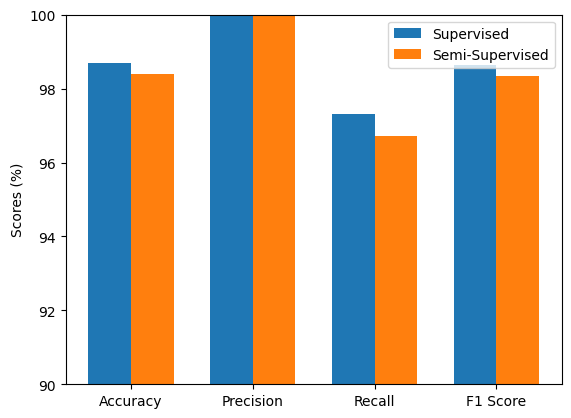

In [ ]:
# Metrics for Semi and Full models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
semi_values = [accuSemi, presSemi, recallSemi, f1Semi]
full_values = [accuFull, presFull, recallFull, f1Full]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, full_values, width, label='Supervised')
rects2 = ax.bar(x + width/2, semi_values, width, label='Semi-Supervised')

ax.set_ylabel('Scores (%)')
#ax.set_title('Comparison of Semi and Full Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(90, 100)
plt.savefig("graph_knn.png", dpi=600, bbox_inches='tight')
plt.show()

### 6.2 Heatmap of supervised and semi supervised confusion matrix

The confusion matrix shows us the number of True postive, True negatives, False positives and False negatives. It helps us better see in what area the model could be improved

From the heat maps below we can see that the number of false positive is 0, which is excellent. The number of false negatives is around 400, which denotes that the model is classifying some normal condition data as attack condition.

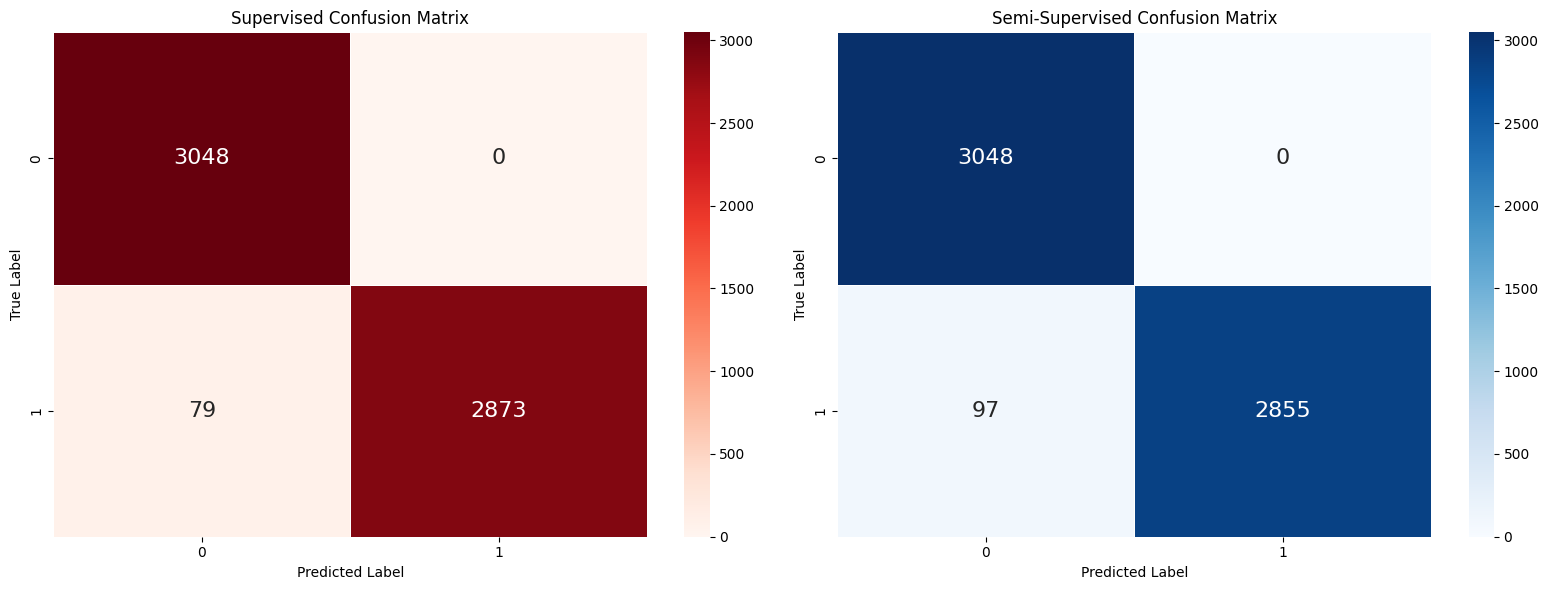

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the Semi Model Confusion Matrix
sns.heatmap(cmSemi, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16}, ax=axes[1])
axes[1].set_title('Semi-Supervised Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Plotting the Full Model Confusion Matrix
sns.heatmap(cmFull, annot=True, fmt='d', cmap='Reds', linewidths=0.5, annot_kws={"size": 16}, ax=axes[0])
axes[0].set_title('Supervised Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

plt.tight_layout()
plt.savefig("cm_knn.png", dpi=600, bbox_inches='tight')
plt.show()

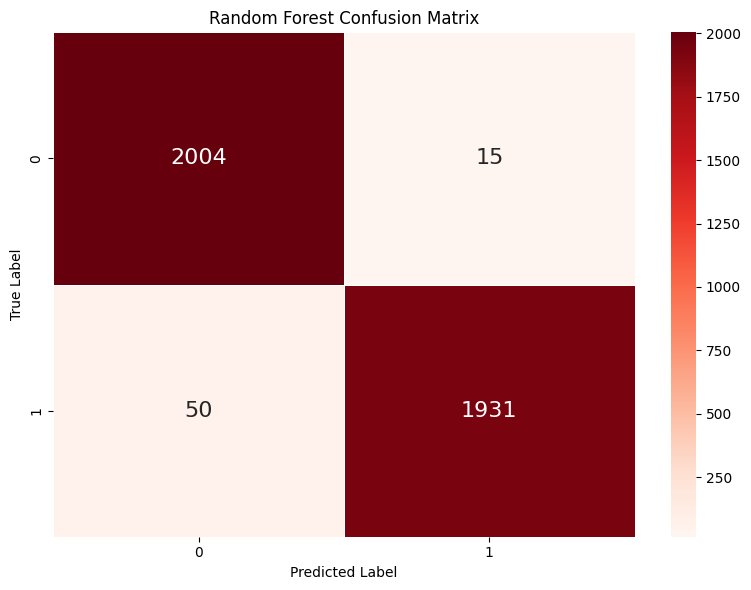

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', linewidths=0.5, annot_kws={"size": 16})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("cm_rf.png", dpi=600, bbox_inches='tight')
plt.show()

## 7. Conclusion
1. **Observations**
   1. Semi-supervised show marginally less accuracy and precision than supervised models
   2. Random forest model is performing better on the new dataset than the previous dataset.
2. **Future Direction**
   1. Applying CNN to the new Dataset to achieve an efficiency of higher than 99.5%.
   2. Retrain the remaining older models on the new dataset to get compare results.